In [1]:
from data_utils.prepare_data import load_images
from autoencoders.VQ_VAE.VQ_VAE import VQ_VAE,VQ_VAE2
from trainers.autoencoder_trainer import VQVAE_Trainer
from yaml import safe_load
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = safe_load(open("./configs/default_all256.yaml"))
train_dataloader, validation_dataloader, test_dataloader = load_images(
        config['img_size'], 
        config['validation_ratio'], 
        config['test_ratio'], 
        config['batch_size'],
        'celebA'
    )


In [3]:
vqvae_config = config['VQ-VAE']
if 'version' in vqvae_config.keys() and vqvae_config['version'] == 2:
    vqvae = VQ_VAE2(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size'],
        vqvae_config['lower_bound_factor']
    )
else:
    vqvae_config['version'] = 1
    vqvae = VQ_VAE(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vqvae_config['device'] = device

In [4]:
checkpoint = torch.load('./results/best_model_exp22.pth', map_location=device)
vqvae.load_state_dict(checkpoint)
vqvae = vqvae.to(device)

In [20]:
vqvae.eval()
test_image = next(iter(test_dataloader))

In [21]:
rec_images,_ = vqvae(test_image.to(device))

In [22]:
def map_to_correct_coordinates(image):
    return (image + 1) / 2

In [23]:
test_image_6 = test_image[6:12]
rec_images_6 = rec_images[6:12].detach().cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


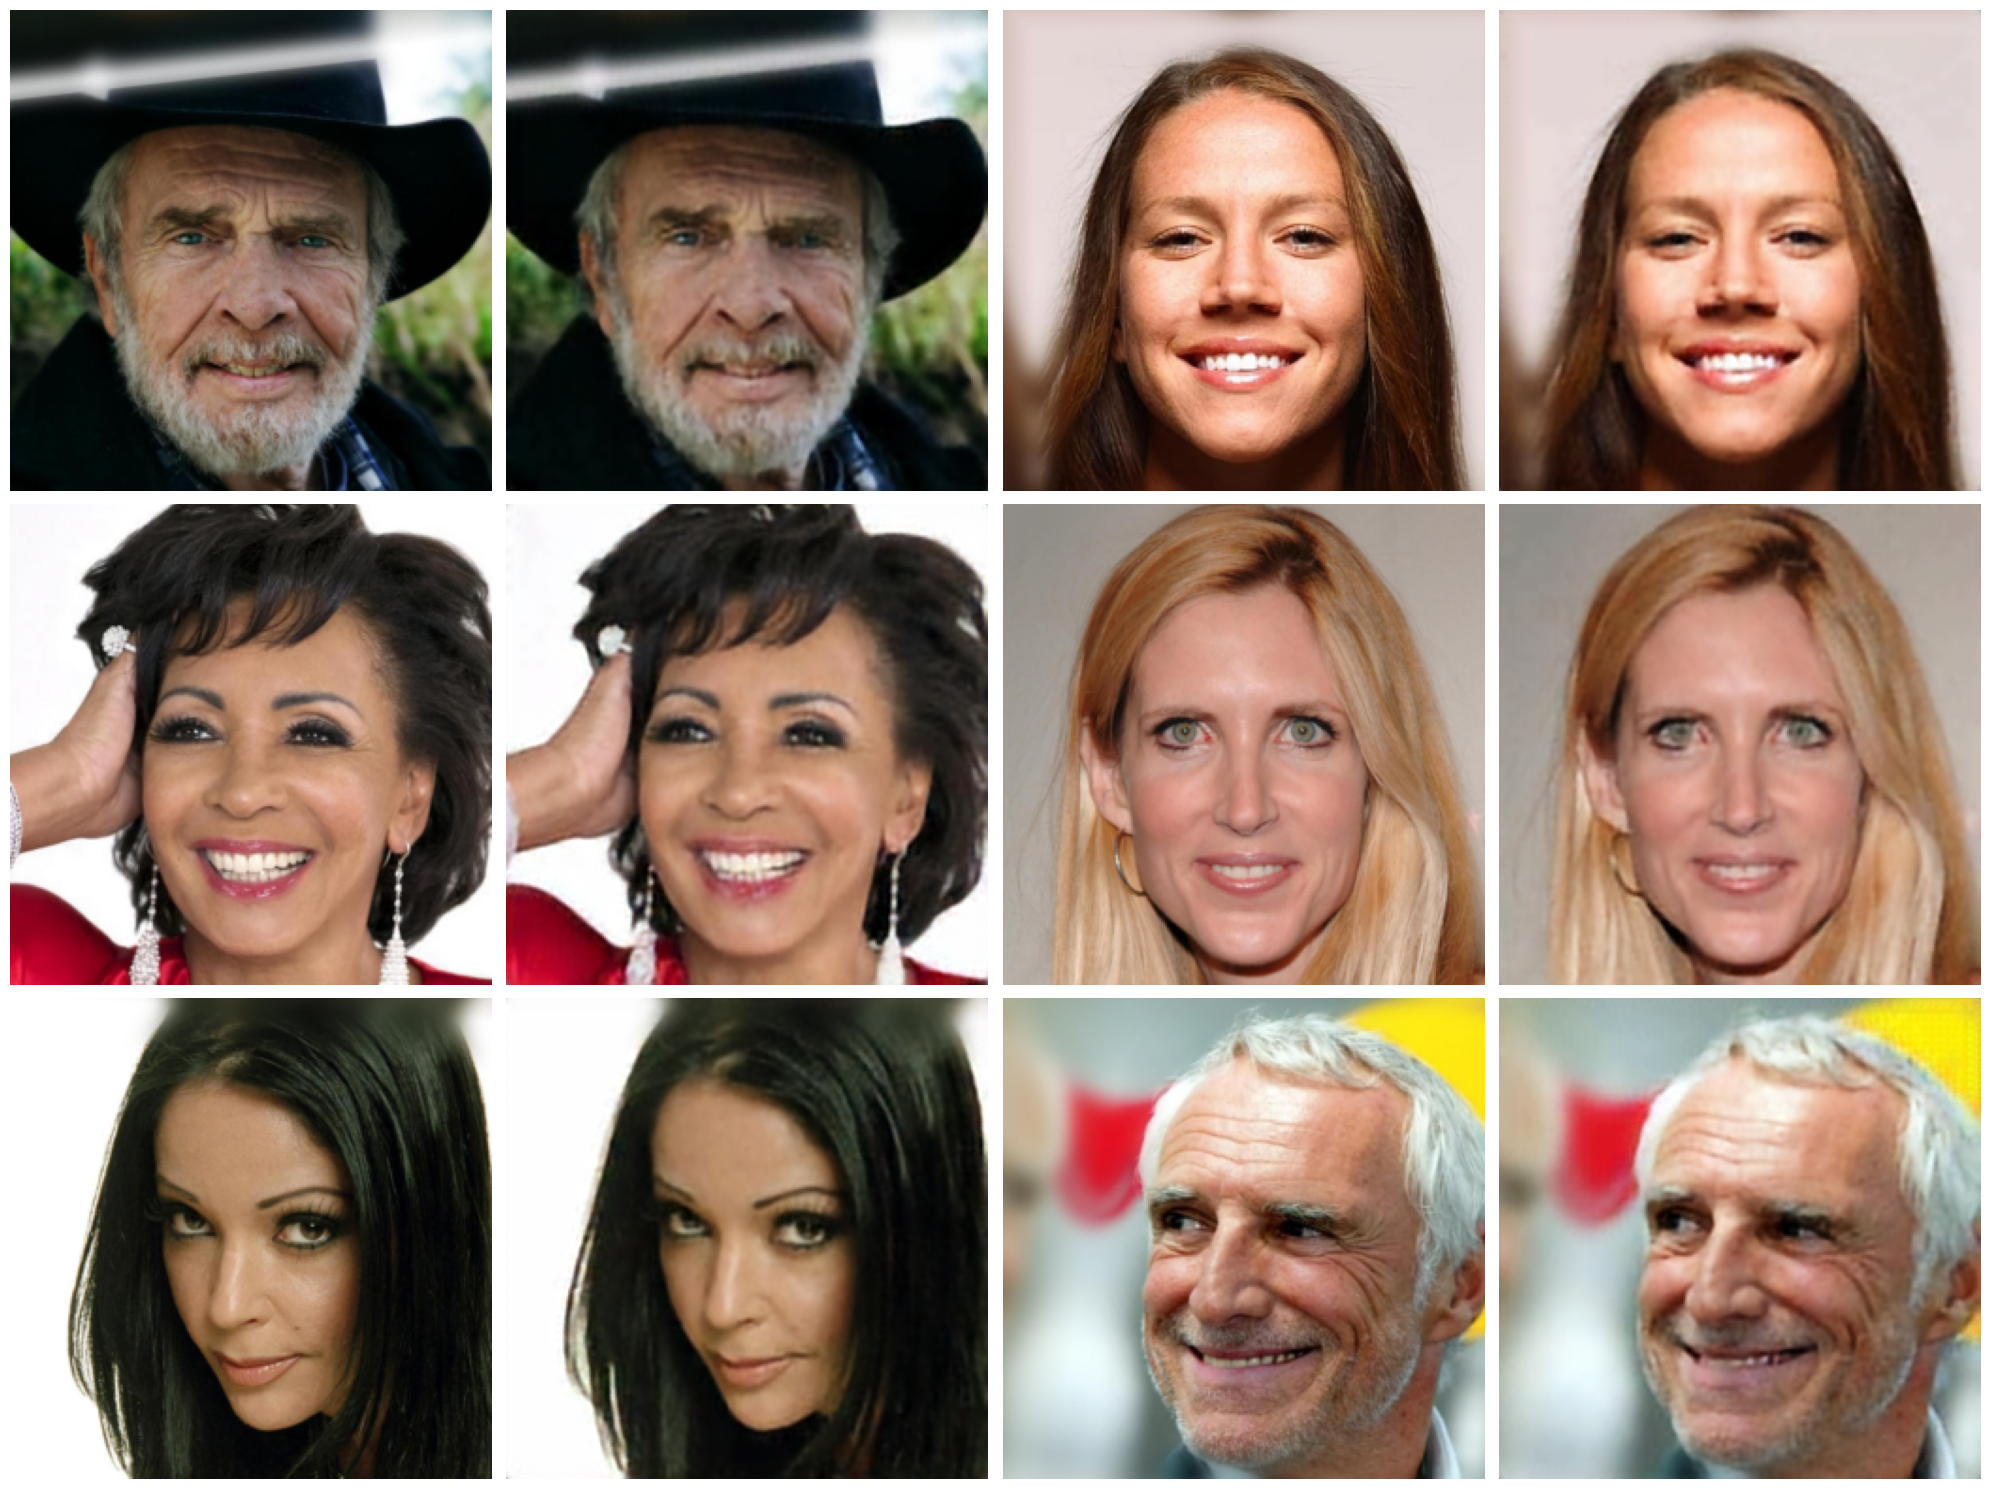

In [24]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Flatten the axis array for easy iteration
axs_flat = axs.flatten()

# Assuming there are exactly 6 original and 6 reconstructed images for a perfect 3x4 grid
for i in range(6):  # Looping through all 6 pairs
    # Original Image
    orig_img_rearranged = map_to_correct_coordinates(np.transpose(test_image_6[i], (1, 2, 0)))
    axs_flat[i*2].imshow(orig_img_rearranged)  # Even indices for original images
    axs_flat[i*2].axis('off')  # Hide axis

    # Reconstructed Image
    rec_img_rearranged = map_to_correct_coordinates(np.transpose(rec_images_6[i], (1, 2, 0)))
    axs_flat[i*2 + 1].imshow(rec_img_rearranged)  # Odd indices for reconstructed images
    axs_flat[i*2 + 1].axis('off')  # Hide axis

plt.tight_layout()
plt.show()

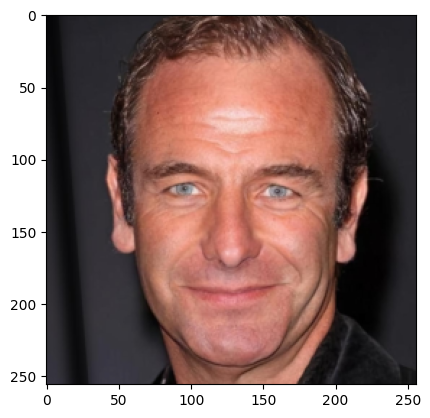

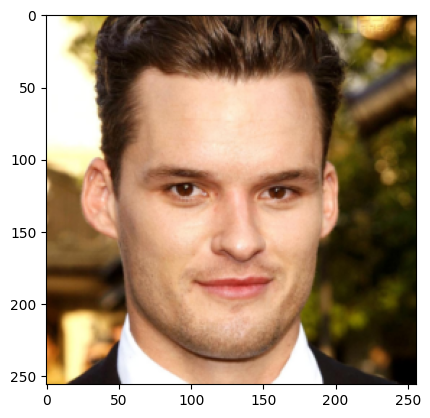

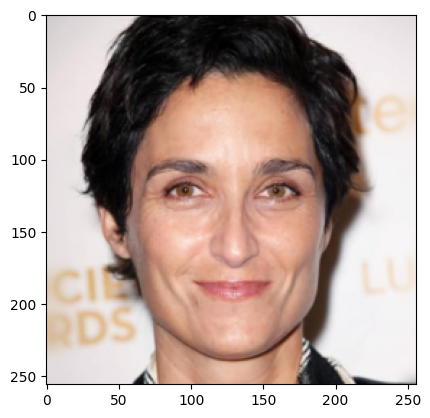

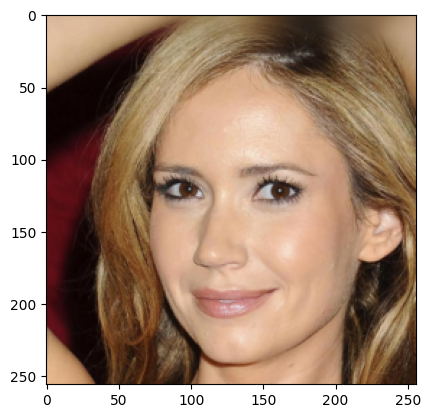

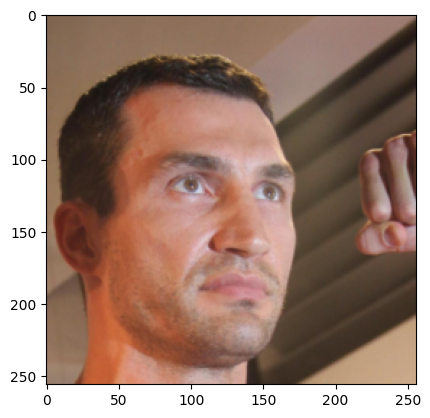

In [11]:
for img in test_image_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


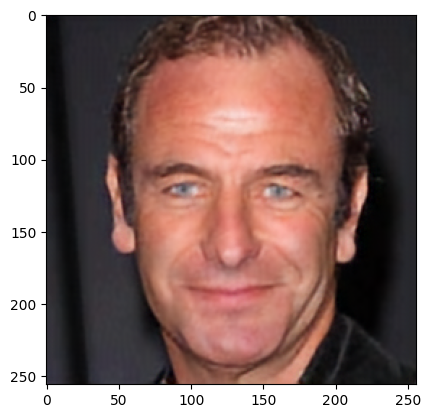

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


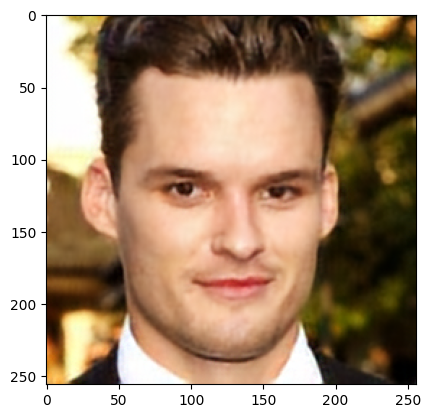

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


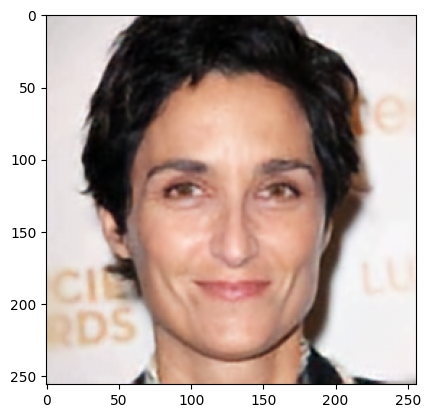

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


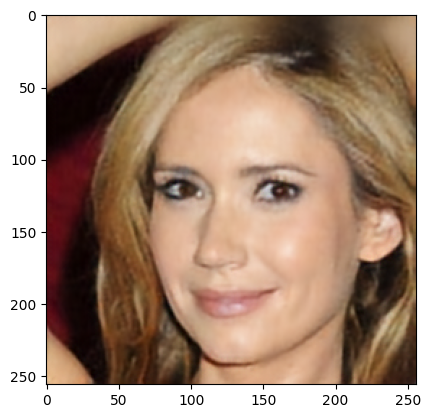

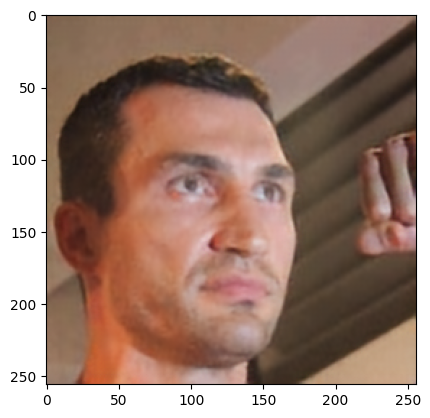

In [12]:
for img in rec_images_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


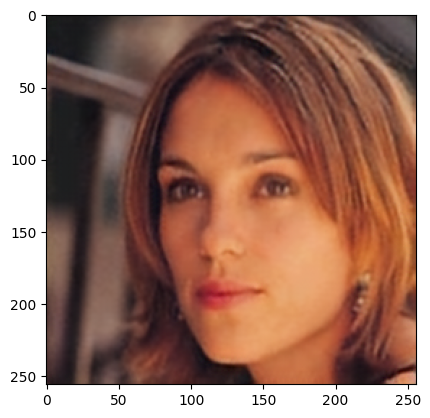

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


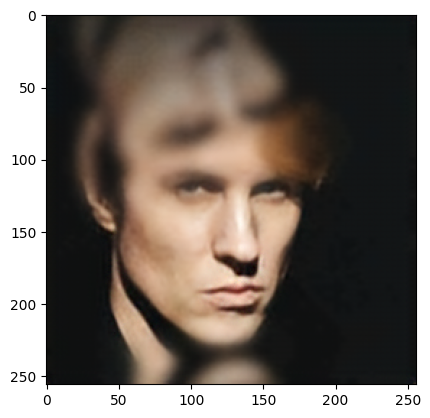

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


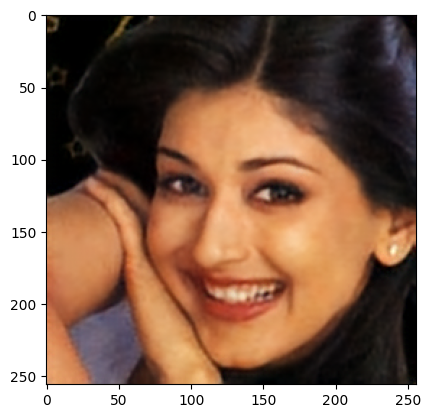

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


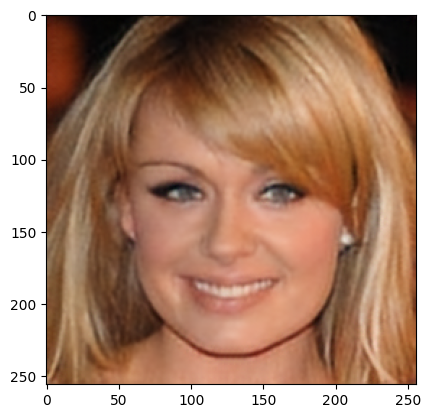

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


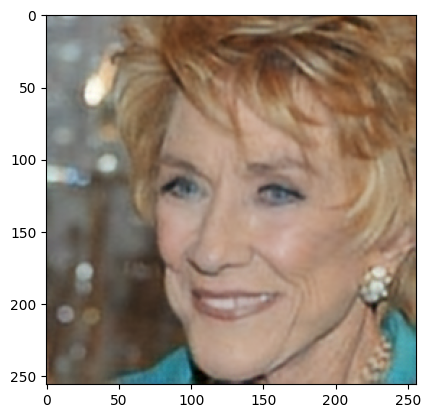

In [12]:
for img in rec_from_code:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

In [4]:
codes_top = np.load('t_codes.npy').flatten()
codes_bottom = np.load('b_codes.npy').flatten()

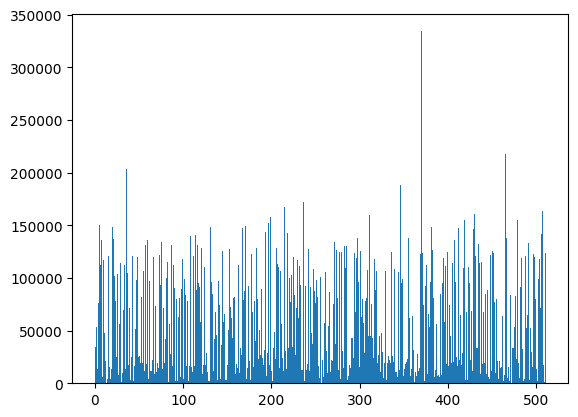

In [5]:
plt.hist(codes_top, bins=range(512))
plt.show()

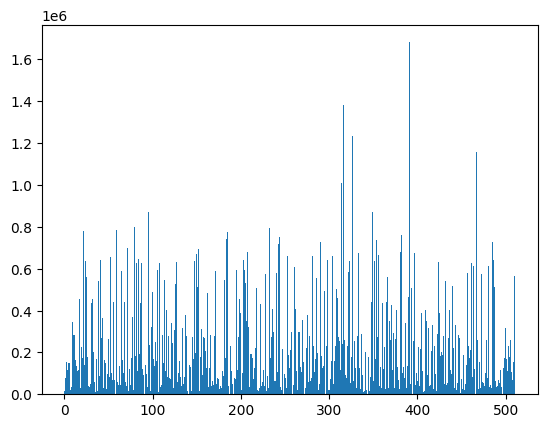

In [6]:
plt.hist(codes_bottom, bins=range(512))
plt.show()

In [33]:
from transformers import AutoTokenizer, MT5ForConditionalGeneration
import torch

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = MT5ForConditionalGeneration.from_pretrained("google-t5/t5-small")

# training
input_ids = tokenizer("Who are you", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids
outputs = model(input_ids=input_ids, labels=labels)
loss = outputs.loss
logits = outputs.logits

You are using a model of type t5 to instantiate a model of type mt5. This is not supported for all configurations of models and can yield errors.
Some weights of MT5ForConditionalGeneration were not initialized from the model checkpoint at google-t5/t5-small and are newly initialized: ['decoder.block.0.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.2.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.2.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.3.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.4.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.4.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_1.weight', 'encoder.block.0.layer.1.DenseReluDense.wi_0.weight', 'encoder.bl

tensor([[25586, 24312, 24312, 21429, 25586, 25586, 25586]])

In [36]:
tokenizer.decode(*torch.argmax(logits, dim=-1))

'craving craving craving craving craving suffered suffered'

In [37]:
bottom_codes = np.load("b_codes.npy").astype(np.int64)[:10]

In [41]:
array1 = bottom_codes.reshape(len(bottom_codes), -1)
array2 = bottom_codes.reshape(len(bottom_codes), -1)

In [45]:
(array1[:, 1:] == array2[:, :-1]).sum()/(array1[:, 1:].shape[0] * array1[:, 1:].shape[1])

0.1659096459096459